In [1]:
# Dependencies
import requests
import json

import pandas as pd
from pandas_datareader import data
from pandas_datareader import wb

import numpy as np

import time
import datetime as dt
from datetime import datetime

import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

In [2]:
bitcoin_comment_times = pd.read_csv('output/comments_bitcoin.csv', index_col = 0)
ethereum_comment_times = pd.read_csv('output/comments_ethereum.csv', index_col= 0)
cardano_comment_times = pd.read_csv('output/comments_cardano.csv', index_col= 0)
dogecoin_comment_times = pd.read_csv('output/comments_dogecoin.csv', index_col= 0)
nasdaq_comment_times = pd.read_csv('output/comments_nasdaq.csv', index_col= 0)
dow_comment_times = pd.read_csv('output/comments_dow.csv', index_col= 0)

C:\Users\12164\anaconda3\envs\PythonData\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
bitcoin_comment_times['Exchange']= 'Bitcoin'
ethereum_comment_times['Exchange']= 'Ethereum'
cardano_comment_times['Exchange']= 'Cardano'
dogecoin_comment_times['Exchange']= 'Dogecoin'
nasdaq_comment_times['Exchange']= 'NASDAQ'
dow_comment_times['Exchange']= 'Dow Jones'

bitcoin_comment_times.head()

,Timestamp,SubReddit,Exchange
0,1527825606,ethereum,Bitcoin
1,1527825642,btc,Bitcoin
2,1527825648,btc,Bitcoin
3,1527825725,btc,Bitcoin
4,1527825939,Sexsells,Bitcoin


In [4]:
reddit_comments = pd.concat([bitcoin_comment_times, ethereum_comment_times, cardano_comment_times, dogecoin_comment_times, nasdaq_comment_times, dow_comment_times], ignore_index= True, keys = ('Bitcoin', 'Ethereum', 'Cardano', 'Dogecoin', 'NASDAQ', 'Dow Jones'))

In [5]:
reddit_comments.dtypes

Timestamp     int64
SubReddit    object
Exchange     object
dtype: object

In [6]:
reddit_comments['DateTime']= [datetime.fromtimestamp(i) for i in reddit_comments['Timestamp']]
reddit_comments

,Timestamp,SubReddit,Exchange,DateTime
0,1527825606,ethereum,Bitcoin,2018-06-01 00:00:06
1,1527825642,btc,Bitcoin,2018-06-01 00:00:42
2,1527825648,btc,Bitcoin,2018-06-01 00:00:48
3,1527825725,btc,Bitcoin,2018-06-01 00:02:05
4,1527825939,Sexsells,Bitcoin,2018-06-01 00:05:39
...,...,...,...,...
1955499,1593573680,Syracuse_comments,Dow Jones,2020-06-30 23:21:20
1955500,1593574736,40kOrkScience,Dow Jones,2020-06-30 23:38:56
1955501,1593575142,confessions,Dow Jones,2020-06-30 23:45:42
1955502,1593575271,wallstreetbets,Dow Jones,2020-06-30 23:47:51


In [7]:
reddit_comments['Date'] = reddit_comments['DateTime'].dt.date
reddit_comments.head()

,Timestamp,SubReddit,Exchange,DateTime,Date
0,1527825606,ethereum,Bitcoin,2018-06-01 00:00:06,2018-06-01
1,1527825642,btc,Bitcoin,2018-06-01 00:00:42,2018-06-01
2,1527825648,btc,Bitcoin,2018-06-01 00:00:48,2018-06-01
3,1527825725,btc,Bitcoin,2018-06-01 00:02:05,2018-06-01
4,1527825939,Sexsells,Bitcoin,2018-06-01 00:05:39,2018-06-01


In [8]:
reddit_comments_clean = reddit_comments[['Date', 'SubReddit', 'Exchange']]
reddit_comments_clean

,Date,SubReddit,Exchange
0,2018-06-01,ethereum,Bitcoin
1,2018-06-01,btc,Bitcoin
2,2018-06-01,btc,Bitcoin
3,2018-06-01,btc,Bitcoin
4,2018-06-01,Sexsells,Bitcoin
...,...,...,...
1955499,2020-06-30,Syracuse_comments,Dow Jones
1955500,2020-06-30,40kOrkScience,Dow Jones
1955501,2020-06-30,confessions,Dow Jones
1955502,2020-06-30,wallstreetbets,Dow Jones


In [9]:
df = pd.DataFrame(reddit_comments_clean.groupby(['Exchange', 'Date']).count()).reset_index()
df

,Exchange,Date,SubReddit
0,Bitcoin,2018-06-01,2543
1,Bitcoin,2018-06-02,2286
2,Bitcoin,2018-06-03,2191
3,Bitcoin,2018-06-04,2548
4,Bitcoin,2018-06-05,2487
...,...,...,...
4561,NASDAQ,2020-06-26,161
4562,NASDAQ,2020-06-27,88
4563,NASDAQ,2020-06-28,196
4564,NASDAQ,2020-06-29,191


In [10]:
bitcoin_two_year = df.loc[df['Exchange']=='Bitcoin', :].set_index("Date")
ethereum_two_year = df.loc[df['Exchange']=='Ethereum', :].set_index("Date")
cardano_two_year = df.loc[df['Exchange']=='Cardano', :].set_index("Date")
dogecoin_two_year = df.loc[df['Exchange']=='Dogecoin', :].set_index("Date")
nasdaq_two_year = df.loc[df['Exchange']=='NASDAQ', :].set_index("Date")
dow_two_year = df.loc[df['Exchange']=='Dow Jones', :].set_index("Date")

bitcoin_two_year



,Exchange,SubReddit
Date,,
2018-06-01,Bitcoin,2543
2018-06-02,Bitcoin,2286
2018-06-03,Bitcoin,2191
2018-06-04,Bitcoin,2548
2018-06-05,Bitcoin,2487
...,...,...
2020-06-26,Bitcoin,1600
2020-06-27,Bitcoin,1479
2020-06-28,Bitcoin,1593


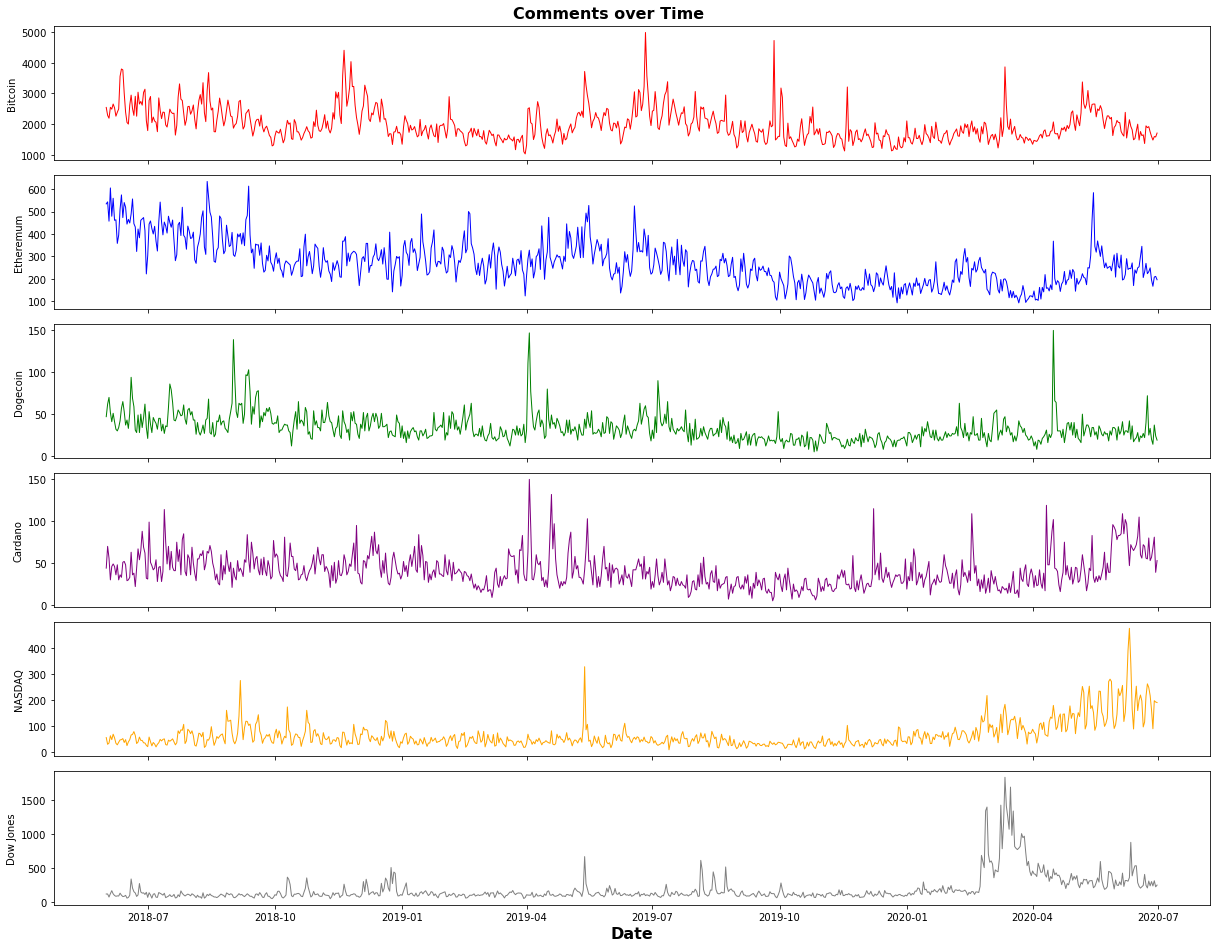

In [11]:
date_range = df.loc[df['Exchange']=='Bitcoin', :]["Date"]
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True,figsize=(17,13))
fig.suptitle("Comments over Time", fontsize=16, fontweight="bold", y= 1.01)

ax1.plot(date_range, bitcoin_two_year["SubReddit"], linewidth=1, color ="red")
ax1.set_ylabel(f"Bitcoin")

ax2.plot(date_range, ethereum_two_year["SubReddit"], linewidth=1, color ="blue")
ax2.set_ylabel(f"Etheremum")

ax3.plot(date_range, dogecoin_two_year["SubReddit"], linewidth=1,color ="green")
ax3.set_ylabel(f"Dogecoin")

ax4.plot(date_range, cardano_two_year["SubReddit"], linewidth=1, color ="purple")
ax4.set_ylabel(f"Cardano")

ax5.plot(date_range, nasdaq_two_year["SubReddit"], linewidth=1, color ="orange")
ax5.set_ylabel(f"NASDAQ")

ax6.plot(date_range, dow_two_year["SubReddit"], linewidth=1, color ="gray")
ax6.set_ylabel(f"Dow Jones")
ax6.set_xlabel("Date",fontsize=16, fontweight="bold")

#save plot
plt.savefig("output/comment_counts_all.png")

plt.tight_layout()
plt.show()

In [12]:
#creat a list of cryptocurrencies
crypto_list=["BTC-USD","ETH-USD","DOGE-USD","ADA-USD",]

#define date range
start_d = "2018-06-01"
end_d = "2020-06-30"

#creat dataframe
crypto_list_df = data.DataReader(crypto_list, "yahoo", start_d,end_d)

#print to see structure
print(crypto_list_df)

Attributes    Adj Close                                        Close  \
Symbols         BTC-USD     ETH-USD  DOGE-USD   ADA-USD      BTC-USD   
Date                                                                   
2018-05-31  7541.450195  580.043030  0.003423  0.222507  7541.450195   
2018-06-01  7643.450195  591.807983  0.003558  0.227742  7643.450195   
2018-06-02  7720.250000  618.328979  0.003690  0.228154  7720.250000   
2018-06-03  7514.470215  592.984985  0.003532  0.214012  7514.470215   
2018-06-04  7633.759766  609.302979  0.003654  0.220467  7633.759766   
...                 ...         ...       ...       ...          ...   
2020-06-26  9045.390625  222.959793  0.002313  0.077679  9045.390625   
2020-06-27  9143.582031  225.347168  0.002326  0.080392  9143.582031   
2020-06-28  9190.854492  228.194870  0.002313  0.083870  9190.854492   
2020-06-29  9137.993164  226.315002  0.002320  0.083116  9137.993164   
2020-06-30  9228.325195  231.113419  0.002354  0.095954  9228.32

In [13]:
#filter out daily volume
crypto_volume = crypto_list_df.Volume.rename(columns={"BTC-USD": "Bitcoin Volume", "ETH-USD": "Etheremum Volume","DOGE-USD":"Dogecoin Volume", "ADA-USD":"Cardano Volume" })
#save to csv
#crypto_volume.to_csv("output/crypto_volume.csv")
#display
crypto_volume.head()

Symbols,Bitcoin Volume,Etheremum Volume,Dogecoin Volume,Cardano Volume
Date,,,,
2018-05-31,4.921460e+09,1.945890e+09,5436780.0,130538000.0
2018-06-01,4.939300e+09,1.880390e+09,5918490.0,116435000.0
2018-06-02,4.851760e+09,1.832550e+09,19570200.0,117208000.0
2018-06-03,4.993170e+09,1.903430e+09,22162200.0,115605000.0
2018-06-04,4.961740e+09,1.844270e+09,18819700.0,119846000.0


In [14]:
group1 = crypto_volume["Bitcoin Volume"]
group2 = crypto_volume["Etheremum Volume"]
group3 = crypto_volume["Dogecoin Volume"]
group4 = crypto_volume["Cardano Volume"]

In [15]:
# Perform the ANOVA
st.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=1010.7924647667405, pvalue=0.0)

In [16]:
bit_comments = bitcoin_two_year["SubReddit"]
bit_vol = crypto_volume["Bitcoin Volume"]

In [17]:
#we cannot assume the requirements for a t-test:
#   Data is normally distributed
#   Data is independent
#   Data is homogenous (The standard deviations are roughly equal)

st.ttest_ind(bit_comments, bit_vol, equal_var=False)

Ttest_indResult(statistic=-36.724510158292276, pvalue=1.3882646469444541e-170)

In [18]:
bitcoin_two_year["SubReddit"].mean()

1978.6741130091984

In [19]:
crypto_volume["Bitcoin Volume"].mean()

17699741432.992115

In [20]:
crypto_volume = pd.read_csv("output/crypto_volume.csv", index_col= 0)
crypto_high = pd.read_csv("output/crypto_high.csv", index_col= 0)
crypto_low = pd.read_csv("output/crypto_low.csv", index_col= 0)

In [21]:
crypto_high.head()

,Bitcoin High,Etheremum High,Dogecoin High,Cardano High
Date,,,,
2018-05-31,7604.729980,589.093018,0.003469,0.229184
2018-06-01,7695.830078,597.077026,0.003584,0.229531
2018-06-02,7754.890137,624.513000,0.003750,0.236761
2018-06-03,7753.819824,623.429016,0.003760,0.231228
2018-06-04,7643.229980,611.330017,0.003722,0.221728


In [22]:
crypto_change = pd.merge(crypto_high, crypto_low, on = 'Date')
crypto_change['Bitcoin Difference'] = crypto_change['Bitcoin High'] - crypto_change['Bitcoin Low']
crypto_change['Etheremum Difference'] = crypto_change['Etheremum High'] - crypto_change['Etheremum Low']
crypto_change['Dogecoin Difference'] = crypto_change['Dogecoin High'] - crypto_change['Dogecoin Low']
crypto_change['Cardano Difference'] = crypto_change['Cardano High'] - crypto_change['Cardano Low']
crypto_change

,Bitcoin High,Etheremum High,Dogecoin High,Cardano High,Bitcoin Low,Etheremum Low,Dogecoin Low,Cardano Low,Bitcoin Difference,Etheremum Difference,Dogecoin Difference,Cardano Difference
Date,,,,,,,,,,,,
2018-05-31,7604.729980,589.093018,0.003469,0.229184,7407.339844,567.664978,0.003336,0.216955,197.390137,21.428040,0.000133,0.012229
2018-06-01,7695.830078,597.077026,0.003584,0.229531,7497.259766,577.322021,0.003400,0.219242,198.570312,19.755005,0.000184,0.010289
2018-06-02,7754.890137,624.513000,0.003750,0.236761,7613.040039,591.258972,0.003545,0.225118,141.850098,33.254028,0.000205,0.011643
2018-06-03,7753.819824,623.429016,0.003760,0.231228,7474.040039,583.747009,0.003512,0.212290,279.779785,39.682007,0.000248,0.018938
2018-06-04,7643.229980,611.330017,0.003722,0.221728,7397.000000,580.981995,0.003514,0.204815,246.229980,30.348022,0.000208,0.016913
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,9207.810547,232.493423,0.002379,0.081239,8998.216797,220.564575,0.002294,0.076109,209.593750,11.928848,0.000085,0.005130
2020-06-27,9197.546875,228.598282,0.002361,0.081413,8975.525391,219.472672,0.002283,0.076251,222.021484,9.125610,0.000078,0.005162
2020-06-28,9237.573242,229.903214,0.002341,0.084336,9041.875977,222.254990,0.002301,0.080338,195.697266,7.648224,0.000040,0.003998


In [23]:
bit_volume = crypto_volume[['Bitcoin Volume']]
bit_volume.reset_index(inplace=True)
bit_volume.head()

,Date,Bitcoin Volume
0,2018-05-31,4.921460e+09
1,2018-06-01,4.939300e+09
2,2018-06-02,4.851760e+09
3,2018-06-03,4.993170e+09
4,2018-06-04,4.961740e+09


In [24]:
bit_comments = df.loc[df['Exchange']=='Bitcoin', ['Date', 'SubReddit']]
bit_comments.reset_index()
bit_comments['Date'] = [i.strftime("%Y-%m-%d") for i in bit_comments['Date']]
bit_comments.head()

,Date,SubReddit
0,2018-06-01,2543
1,2018-06-02,2286
2,2018-06-03,2191
3,2018-06-04,2548
4,2018-06-05,2487


In [25]:
bit_merged_df = pd.merge(bit_comments, bit_volume)
bit_merged_df

,Date,SubReddit,Bitcoin Volume
0,2018-06-01,2543,4.939300e+09
1,2018-06-02,2286,4.851760e+09
2,2018-06-03,2191,4.993170e+09
3,2018-06-04,2548,4.961740e+09
4,2018-06-05,2487,4.692260e+09
...,...,...,...
755,2020-06-26,1600,1.727309e+10
756,2020-06-27,1479,1.456087e+10
757,2020-06-28,1593,1.646055e+10
758,2020-06-29,1581,1.573580e+10


In [26]:
bit_comments_merged = bit_merged_df['SubReddit']
bit_volume_merged = bit_merged_df['Bitcoin Volume']

correlation = st.pearsonr(bit_comments_merged, bit_volume_merged)

print(f"The correlation between Bitcoin Reddit Comments and the Bitcoin Volume in June 1, 2018 to June 30, 2020 is {correlation[0]}")

The correlation between Bitcoin Reddit Comments and the Bitcoin Volume in June 1, 2018 to June 30, 2020 is -0.07710875311706072


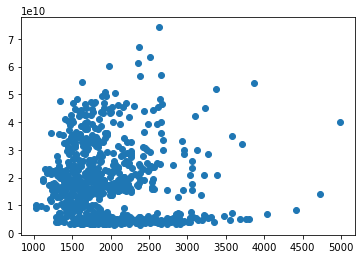

In [27]:
plt.scatter(bit_comments_merged, bit_volume_merged)
plt.show()

The correlation between Bitcoin Reddit Comments and the Bitcoin change in Price in June 1, 2018 to June 30, 2020 is 0.3838310083141171


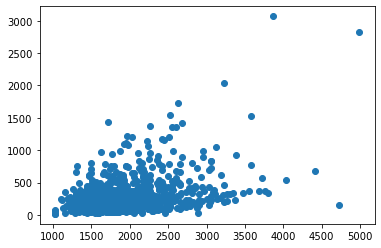

In [28]:
bit_difference = crypto_change[['Bitcoin Difference']]
bit_difference.reset_index(inplace=True)

bit_diff_merged = pd.merge(bit_comments, bit_difference)
bit_com = bit_diff_merged['SubReddit']
bit_diff = bit_diff_merged['Bitcoin Difference']

correlation = st.pearsonr(bit_com, bit_diff)

print(f"The correlation between Bitcoin Reddit Comments and the Bitcoin change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(bit_com, bit_diff)
plt.show()

The correlation between Ethereum Reddit Comments and the Ethereum Volume in June 1, 2018 to June 30, 2020 is -0.4155885233514123


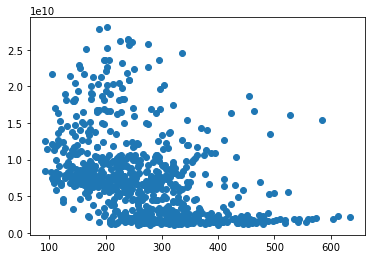

In [29]:
ether_comments = df.loc[df['Exchange']=='Ethereum', ['Date', 'SubReddit']]
ether_comments.reset_index()
ether_comments['Date'] = [i.strftime("%Y-%m-%d") for i in ether_comments['Date']]

ether_volume = crypto_volume[["Etheremum Volume"]]
ether_volume.reset_index(inplace=True)

ether_merged_df = pd.merge(ether_comments, ether_volume)
ether_comments_merged = ether_merged_df['SubReddit']
ether_volume_merged = ether_merged_df['Etheremum Volume']
correlation = st.pearsonr(ether_comments_merged, ether_volume_merged)

print(f"The correlation between Ethereum Reddit Comments and the Ethereum Volume in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(ether_comments_merged, ether_volume_merged)
plt.show()

The correlation between Bitcoin Reddit Comments and the Bitcoin change in Price in June 1, 2018 to June 30, 2020 is 0.3875271313881695


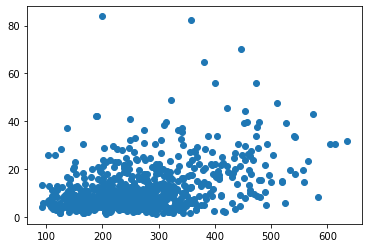

In [30]:
ether_difference = crypto_change[['Etheremum Difference']]
ether_difference.reset_index(inplace=True)

ether_diff_merged = pd.merge(ether_comments, ether_difference)
ether_com = ether_diff_merged['SubReddit']
ether_diff = ether_diff_merged['Etheremum Difference']

correlation = st.pearsonr(ether_com, ether_diff)

print(f"The correlation between Bitcoin Reddit Comments and the Bitcoin change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(ether_com, ether_diff)
plt.show()

The correlation between Cardano Reddit Comments and the Cardano Volume in June 1, 2018 to June 30, 2020 is 0.2845740181977755


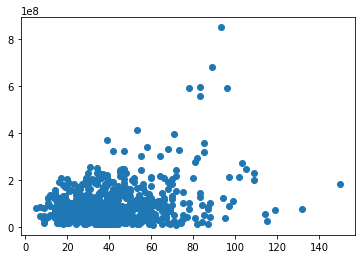

In [31]:
card_comments = df.loc[df['Exchange']=='Cardano', ['Date', 'SubReddit']]
card_comments.reset_index()
card_comments['Date'] = [i.strftime("%Y-%m-%d") for i in card_comments['Date']]
card_volume = crypto_volume[["Cardano Volume"]]
card_volume.reset_index(inplace=True)
card_merged_df = pd.merge(card_comments, card_volume)
card_comments_merged = card_merged_df['SubReddit']
card_volume_merged = card_merged_df['Cardano Volume']
correlation = st.pearsonr(card_comments_merged, card_volume_merged)

print(f"The correlation between Cardano Reddit Comments and the Cardano Volume in June 1, 2018 to June 30, 2020 is {correlation[0]}")
plt.scatter(card_comments_merged, card_volume_merged)
plt.show()

The correlation between Cardano Reddit Comments and the Cardano change in Price in June 1, 2018 to June 30, 2020 is 0.2580703448408521


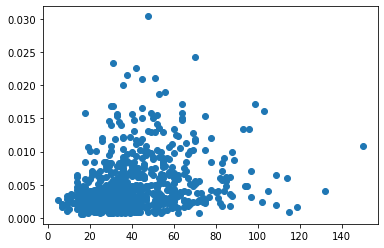

In [32]:
card_difference = crypto_change[['Cardano Difference']]
card_difference.reset_index(inplace=True)

card_diff_merged = pd.merge(card_comments, card_difference)
card_com = card_diff_merged['SubReddit']
card_diff = card_diff_merged['Cardano Difference']

correlation = st.pearsonr(card_com, card_diff)

print(f"The correlation between Cardano Reddit Comments and the Cardano change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(card_com, card_diff)
plt.show()

The correlation between Dogecoin Reddit Comments and the Dogecoin Volume in June 1, 2018 to June 30, 2020 is -0.1598712877065133


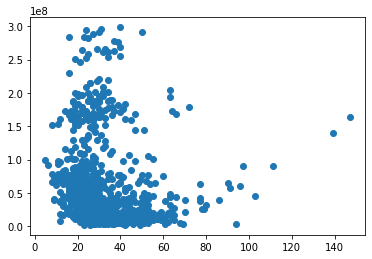

In [33]:
doge_comments = df.loc[df['Exchange']=='Dogecoin', ['Date', 'SubReddit']]
doge_comments.reset_index()
doge_comments['Date'] = [i.strftime("%Y-%m-%d") for i in doge_comments['Date']]
doge_volume = crypto_volume[["Dogecoin Volume"]]
doge_volume.reset_index(inplace=True)
doge_merged_df = pd.merge(doge_comments, doge_volume)
doge_comments_merged = doge_merged_df['SubReddit']
doge_volume_merged = doge_merged_df['Dogecoin Volume']
correlation = st.pearsonr(doge_comments_merged, doge_volume_merged)

print(f"The correlation between Dogecoin Reddit Comments and the Dogecoin Volume in June 1, 2018 to June 30, 2020 is {correlation[0]}")
plt.scatter(doge_comments_merged, doge_volume_merged)
plt.show()

The correlation between Dogecoin Reddit Comments and the Dogecoin change in Price in June 1, 2018 to June 30, 2020 is 0.4618681910462514


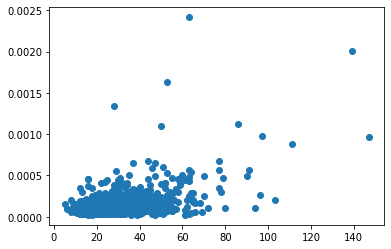

In [34]:
doge_difference = crypto_change[['Dogecoin Difference']]
doge_difference.reset_index(inplace=True)

doge_diff_merged = pd.merge(doge_comments, doge_difference)
doge_com = doge_diff_merged['SubReddit']
doge_diff = doge_diff_merged['Dogecoin Difference']

correlation = st.pearsonr(doge_com, doge_diff)

print(f"The correlation between Dogecoin Reddit Comments and the Dogecoin change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(doge_com, doge_diff)
plt.show()

In [35]:
stock_indexes_list_volume = pd.read_csv("output/stock_indexes_volume.csv", index_col= 0)
stock_indexes_high = pd.read_csv("output/stock_indexes_high.csv", index_col= 0)
stock_indexes_low = pd.read_csv("output/stock_indexes_low.csv", index_col= 0)

stock_change = pd.merge(stock_indexes_high, stock_indexes_low, on = 'Date')

stock_change['Dow Jones Difference'] = stock_change['Dow Jones High'] - stock_change['Dow Jones Low']
stock_change['NASDAQ Difference'] = stock_change['NASDAQ High'] - stock_change['NASDAQ Low']

stock_change

,Dow Jones High,NASDAQ High,Dow Jones Low,NASDAQ Low,Dow Jones Difference,NASDAQ Difference
Date,,,,,,
2018-06-01,24673.60,7557.38,24542.09,7487.23,131.51,70.15
2018-06-04,24859.37,7607.17,24722.14,7561.20,137.23,45.97
2018-06-05,24838.78,7644.48,24710.82,7602.38,127.96,42.10
2018-06-06,25146.46,7691.65,24854.14,7622.31,292.32,69.34
2018-06-07,25326.09,7697.41,25164.48,7597.66,161.61,99.75
...,...,...,...,...,...,...
2020-06-24,25992.96,10137.50,25296.73,9842.22,696.23,295.28
2020-06-25,25769.61,10023.28,25209.79,9810.47,559.82,212.81
2020-06-26,25641.69,10000.67,24971.03,9749.07,670.66,251.60


The correlation between NASDAQ Reddit Comments and the NASDAQ Volume in June 1, 2018 to June 30, 2020 is 0.7394253806748537


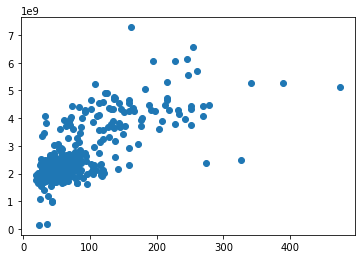

In [36]:
nasdaq_comments = df.loc[df['Exchange']=='NASDAQ', ['Date', 'SubReddit']]
nasdaq_comments.reset_index()
nasdaq_comments['Date'] = [i.strftime("%Y-%m-%d") for i in nasdaq_comments['Date']]
nasdaq_volume = stock_indexes_list_volume[['NASDAQ Volume']]
nasdaq_volume.reset_index(inplace=True)
nasdaq_merged_df = pd.merge(nasdaq_comments, nasdaq_volume)
nasdaq_comments_merged = nasdaq_merged_df['SubReddit']
nasdaq_volume_merged = nasdaq_merged_df['NASDAQ Volume']
correlation = st.pearsonr(nasdaq_comments_merged, nasdaq_volume_merged)

print(f"The correlation between NASDAQ Reddit Comments and the NASDAQ Volume in June 1, 2018 to June 30, 2020 is {correlation[0]}")
plt.scatter(nasdaq_comments_merged, nasdaq_volume_merged)
plt.show()

The correlation between NASDAQ Reddit Comments and the NASDAQ change in Price in June 1, 2018 to June 30, 2020 is 0.4263275477851225


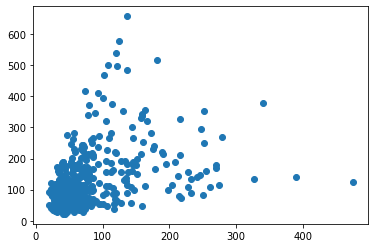

In [37]:
nasdaq_difference = stock_change[['NASDAQ Difference']]
nasdaq_difference.reset_index(inplace=True)

nasdaq_diff_merged = pd.merge(nasdaq_comments, nasdaq_difference)
nasdaq_com = nasdaq_diff_merged['SubReddit']
nasdaq_diff = nasdaq_diff_merged['NASDAQ Difference']

correlation = st.pearsonr(nasdaq_com, nasdaq_diff)

print(f"The correlation between NASDAQ Reddit Comments and the NASDAQ change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(nasdaq_com, nasdaq_diff)
plt.show()

The correlation between Dow Comments and the Dow Jones in June 1, 2018 to June 30, 2020 is 0.7775113642547149


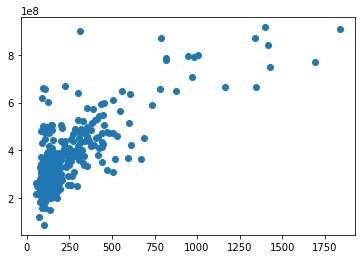

In [38]:
dow_volume = stock_indexes_list_volume[['Dow Jones Volume']]
dow_volume.reset_index(inplace=True)
dow_comments = df.loc[df['Exchange']=='Dow Jones', ['Date', 'SubReddit']]
dow_comments.reset_index()
dow_comments['Date'] = [i.strftime("%Y-%m-%d") for i in dow_comments['Date']]
dow_merged_df = pd.merge(dow_comments, dow_volume)
dow_comments_merged = dow_merged_df['SubReddit']
dow_volume_merged = dow_merged_df['Dow Jones Volume']
correlation = st.pearsonr(dow_comments_merged, dow_volume_merged)

print(f"The correlation between Dow Comments and the Dow Jones in June 1, 2018 to June 30, 2020 is {correlation[0]}")
plt.scatter(dow_comments_merged, dow_volume_merged)
plt.show()

The correlation between Dow Jones Reddit Comments and the Dow Jones change in Price in June 1, 2018 to June 30, 2020 is 0.8208300478702695


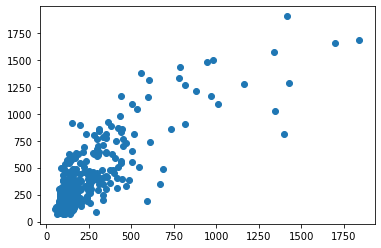

In [39]:
dow_difference = stock_change[['Dow Jones Difference']]
dow_difference.reset_index(inplace=True)

dow_diff_merged = pd.merge(dow_comments, dow_difference)
dow_com = dow_diff_merged['SubReddit']
dow_diff = dow_diff_merged['Dow Jones Difference']

correlation = st.pearsonr(dow_com, dow_diff)

print(f"The correlation between Dow Jones Reddit Comments and the Dow Jones change in Price in June 1, 2018 to June 30, 2020 is {correlation[0]}")

plt.scatter(dow_com, dow_diff)
plt.show()